In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from FinancialMachineLearning.portfolio_optimization.critical_line_algorithm import CriticalLineAlgorithm
from FinancialMachineLearning.portfolio_optimization.historical_risk_parity import HierarchicalRiskParity
from FinancialMachineLearning.portfolio_optimization.mean_variance import MeanVarianceOptimisation

In [2]:
stock_price = pd.read_csv('../../Data/stock_prices.csv', parse_dates = True, index_col = 'Date')
stock_price = stock_price.dropna(axis = 1)
stock_price

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,49.273335,35.389999,106.639999,52.919998,78.220001,87.629997,37.939999,47.759998,41.299999,79.500000,...,42.090000,51.173328,55.983330,74.529999,67.309998,144.929993,94.379997,77.360001,101.400002,130.630005
2008-01-03,49.716667,35.290001,107.000000,53.119999,78.349998,87.809998,37.919998,48.060001,42.049999,80.440002,...,42.029999,51.293331,55.599998,74.800003,67.500000,144.860001,94.250000,77.459999,101.519997,130.740005
2008-01-04,48.223331,34.599998,106.970001,51.759998,76.570000,88.040001,36.990002,46.919998,40.779999,77.500000,...,42.349998,49.849998,54.536671,72.980003,65.769997,141.309998,94.269997,77.550003,101.650002,128.169998
2008-01-07,48.576668,34.630001,106.949997,51.439999,76.650002,88.199997,37.259998,47.060001,40.220001,77.199997,...,43.230000,50.416672,56.116669,72.949997,65.650002,141.190002,94.680000,77.570000,101.720001,128.059998
2008-01-08,48.200001,34.389999,107.029999,51.320000,76.220001,88.389999,36.970001,46.400002,39.599998,75.849998,...,43.240002,49.566669,55.326672,72.400002,65.360001,138.910004,94.570000,77.650002,101.739998,125.849998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,32.230000,22.920000,116.120003,45.119999,52.630001,113.180000,21.389999,27.980000,44.470001,64.639999,...,51.029999,37.000000,32.380001,43.320000,53.820000,199.600006,139.169998,84.120003,105.790001,171.199997
2016-06-28,33.180000,23.389999,116.519997,45.799999,54.009998,113.160004,22.040001,29.180000,44.849998,66.440002,...,51.220001,37.950001,33.160000,44.740002,54.930000,203.199997,139.460007,84.220001,105.889999,173.820007
2016-06-29,34.020000,23.709999,116.449997,46.400002,55.000000,112.699997,22.430000,29.940001,45.610001,67.699997,...,51.360001,38.540001,33.759998,45.650002,55.669998,206.660004,138.389999,84.190002,105.940002,176.639999


In [3]:
stock_price_downsample = stock_price.resample('W').last()
stock_price_downsample

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-06,48.223331,34.599998,106.970001,51.759998,76.570000,88.040001,36.990002,46.919998,40.779999,77.500000,...,42.349998,49.849998,54.536671,72.980003,65.769997,141.309998,94.269997,77.550003,101.650002,128.169998
2008-01-13,48.950001,34.110001,107.260002,51.119999,75.160004,88.570000,36.459999,45.200001,39.980000,75.599998,...,43.430000,49.523331,56.666672,71.239998,65.110001,140.149994,94.199997,77.769997,102.190002,126.190002
2008-01-20,45.133335,32.230000,108.500000,50.000000,71.709999,89.610001,34.580002,43.240002,37.349998,68.900002,...,40.029999,46.310001,52.313332,67.489998,62.590000,132.059998,95.489998,78.279999,102.650002,120.570000
2008-01-27,44.453335,30.010000,109.199997,49.880001,70.690002,90.199997,33.090000,43.419998,38.439999,68.699997,...,38.180000,47.213329,49.610001,65.900002,63.020000,133.039993,95.949997,78.650002,103.370003,122.190002
2008-02-03,46.540001,31.450001,109.080002,51.320000,73.550003,89.940002,34.610001,44.919998,40.919998,71.349998,...,40.240002,48.983330,50.233330,69.040001,65.129997,139.580002,95.230003,78.309998,102.970001,127.430000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-05,33.880001,26.120001,115.059998,46.919998,58.709999,110.889999,24.860001,32.540001,47.660000,66.540001,...,50.080002,39.500000,33.770000,50.009998,56.369999,210.279999,133.229996,83.339996,105.559998,178.059998
2016-06-12,33.529999,25.150000,115.809998,46.599998,57.150002,111.449997,23.930000,31.260000,47.740002,67.370003,...,50.570000,39.240002,33.610001,48.139999,56.160000,210.070007,134.779999,83.480003,105.690002,178.710007
2016-06-19,33.270000,24.930000,115.389999,45.720001,56.459999,111.720001,23.639999,31.200001,47.200001,66.889999,...,50.549999,38.459999,32.810001,46.869999,54.509998,206.520004,135.610001,83.650002,105.739998,176.520004


In [4]:
stock_returns = np.log(stock_price_downsample / stock_price_downsample.shift(1)).dropna()
stock_returns

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-13,0.014956,-0.014263,0.002707,-0.012442,-0.018586,0.006002,-0.014432,-0.037347,-0.019812,-0.024822,...,0.025182,-0.006575,0.038313,-0.024131,-0.010086,-0.008243,-0.000743,0.002833,0.005298,-0.015569
2008-01-20,-0.081178,-0.056693,0.011494,-0.022153,-0.046989,0.011674,-0.052940,-0.044331,-0.068046,-0.092800,...,-0.081521,-0.067086,-0.079935,-0.054075,-0.039473,-0.059457,0.013601,0.006536,0.004491,-0.045558
2008-01-27,-0.015181,-0.071367,0.006431,-0.002403,-0.014326,0.006562,-0.044044,0.004154,0.028766,-0.002907,...,-0.047317,0.019318,-0.053059,-0.023841,0.006847,0.007393,0.004806,0.004716,0.006990,0.013347
2008-02-03,0.045872,0.046868,-0.001099,0.028460,0.039661,-0.002887,0.044912,0.033963,0.062520,0.037848,...,0.052550,0.036804,0.012486,0.046548,0.032933,0.047988,-0.007532,-0.004332,-0.003877,0.041990
2008-02-10,-0.053852,-0.054898,-0.004226,-0.070218,-0.073470,-0.003230,-0.083419,-0.059151,-0.026998,-0.021247,...,-0.031300,-0.070330,-0.061932,-0.070349,-0.071925,-0.047763,-0.016197,-0.006148,0.002134,-0.045597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-05,0.023896,0.004605,0.006540,0.002561,0.000852,0.011701,0.004435,-0.008568,0.010122,-0.008828,...,0.025277,0.010434,0.027926,0.000800,0.009447,0.000190,0.025697,0.007346,0.001422,-0.002468
2016-06-12,-0.010384,-0.037843,0.006497,-0.006843,-0.026931,0.005037,-0.038127,-0.040131,0.001677,0.012397,...,0.009737,-0.006604,-0.004749,-0.038110,-0.003732,-0.000999,0.011567,0.001679,0.001231,0.003644
2016-06-19,-0.007784,-0.008786,-0.003633,-0.019065,-0.012147,0.002420,-0.012193,-0.001921,-0.011376,-0.007150,...,-0.000396,-0.020078,-0.024090,-0.026736,-0.029821,-0.017044,0.006139,0.002034,0.000473,-0.012330


/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_51560/1023250757.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


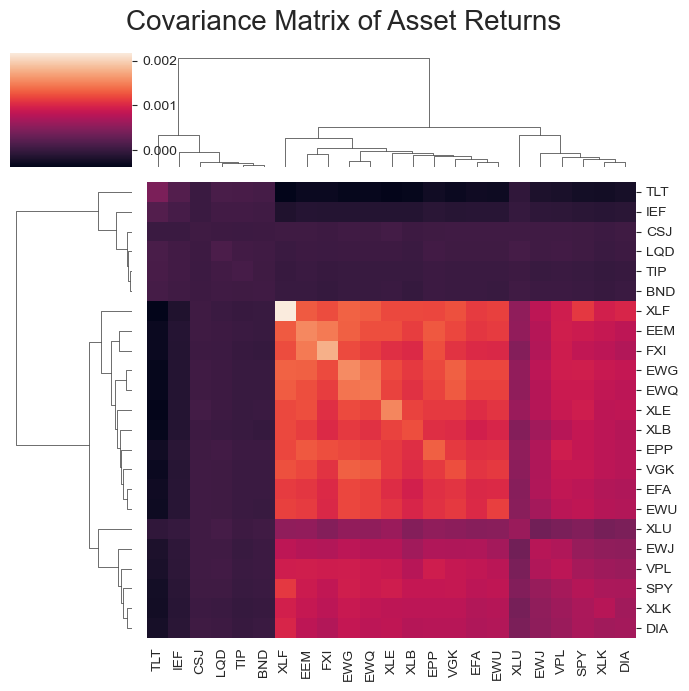

In [6]:
covariance = stock_returns.cov()
g = sns.clustermap(covariance, figsize = (7, 7))
g.fig.suptitle('Covariance Matrix of Asset Returns', fontsize = 20)
plt.tight_layout()
plt.show()

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

correlation = stock_returns.corr()
distances = np.sqrt((1 - correlation) / 2)
clusters = linkage(squareform(distances), method="single")
clusters

array([[18.        , 22.        ,  0.10586684,  2.        ],
       [ 4.        , 16.        ,  0.10918337,  2.        ],
       [ 6.        , 24.        ,  0.12959308,  3.        ],
       [ 1.        , 25.        ,  0.15956415,  4.        ],
       [ 7.        , 26.        ,  0.16717767,  5.        ],
       [ 3.        , 17.        ,  0.17476547,  2.        ],
       [27.        , 28.        ,  0.19326347,  7.        ],
       [12.        , 23.        ,  0.20104112,  3.        ],
       [14.        , 29.        ,  0.2090412 ,  8.        ],
       [30.        , 31.        ,  0.21546079, 11.        ],
       [ 0.        , 32.        ,  0.22565288, 12.        ],
       [ 5.        , 19.        ,  0.23590121,  2.        ],
       [15.        , 33.        ,  0.24253124, 13.        ],
       [ 8.        , 35.        ,  0.24618894, 14.        ],
       [10.        , 36.        ,  0.25999272, 15.        ],
       [ 9.        , 37.        ,  0.2708953 , 16.        ],
       [11.        , 20.

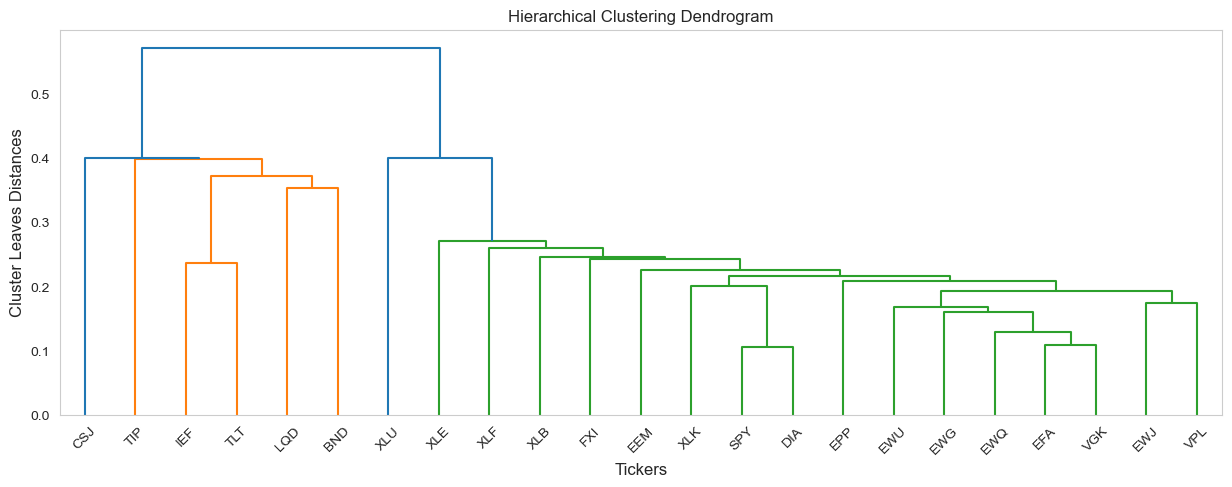

In [21]:
columns = stock_returns.columns
plt.figure(figsize=(15, 5))
dendrogram(clusters, labels=columns)
plt.xlabel('Tickers', fontsize=12)
plt.ylabel('Cluster Leaves Distances', fontsize=12)
plt.grid(False)
plt.title('Hierarchical Clustering Dendrogram', fontsize=12)
plt.show()

#### Denoising

In [26]:
from FinancialMachineLearning.filter.denoising import *
from scipy.optimize import minimize

corr = covariance_to_correlation(covariance)
eVal, eVec = GenerateSamples.getPCA(corr)
bWidth = 0.01
q = 10
out = minimize(lambda *x: GenerateSamples.errPDFs(*x), 0.5, args = (np.diag(eVal), q, bWidth), bounds = ((1E-5,1-1E-5),))
if out['success']:
    var=out['x'][0]
else:
    var=1

In [27]:
pdf = GenerateSamples.fitKDE(np.diag(eVal), bWidth = bWidth)
pdf

0.003734     5.077038
0.007426     5.532555
0.009334     5.563233
0.023734     3.661299
0.038113     2.513102
0.061903     3.887978
0.070439     5.037651
0.074848     4.989806
0.086023     3.276228
0.121595     2.622507
0.133292     2.820513
0.153824     1.954912
0.223476     1.734532
0.278297     1.734693
0.321391     1.734693
0.377622     1.734532
0.453138     1.748857
0.484110     1.748857
0.544667     1.734532
0.606890     1.734532
0.879543     1.734532
3.995794     1.734532
14.050808    1.734532
dtype: float64

In [77]:
eMax, var0 = GenerateSamples.findMaxEval(np.diag(eVal), stock_returns.shape[0] / float(stock_returns.shape[1]), bWidth = bWidth)

In [82]:
marcenko_pastur = GenerateSamples.mpPDF(var0, q = stock_returns.shape[0] / float(stock_returns.shape[1]), pts = 1000)

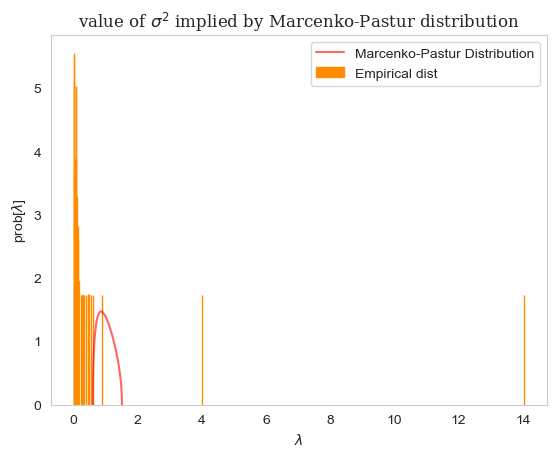

In [83]:
ax = plt.figure().add_subplot(111)
ax.plot(marcenko_pastur, label = 'Marcenko-Pastur Distribution', color = 'red', alpha = 0.6)
ax.bar(pdf.index, pdf.values, width = bWidth, label= 'Empirical dist', color = 'darkorange', edgecolor = 'darkorange')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'prob[$\lambda$]')
ax.set_title(r'value of $\sigma^2$ implied by Marcenko-Pastur distribution', fontsize = 12, fontfamily = 'Serif')
ax.grid(False)
ax.legend()

$\sigma^2$의 값은 고유값의 분산 정도를 보여준다

In [87]:
nFacts = eVal.shape[0] - np.diag(eVal)[::-1].searchsorted(eMax)

In [88]:
denoise = DenoiseCorrelation(eVal, eVec, nFacts = nFacts)
denoised_corr = denoise.constant_residual_eigenvalue()

In [99]:
denoised_corr = pd.DataFrame(denoised_corr)
denoised_corr.index = correlation.index
denoised_corr.columns = correlation.columns

/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_65439/3471682700.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


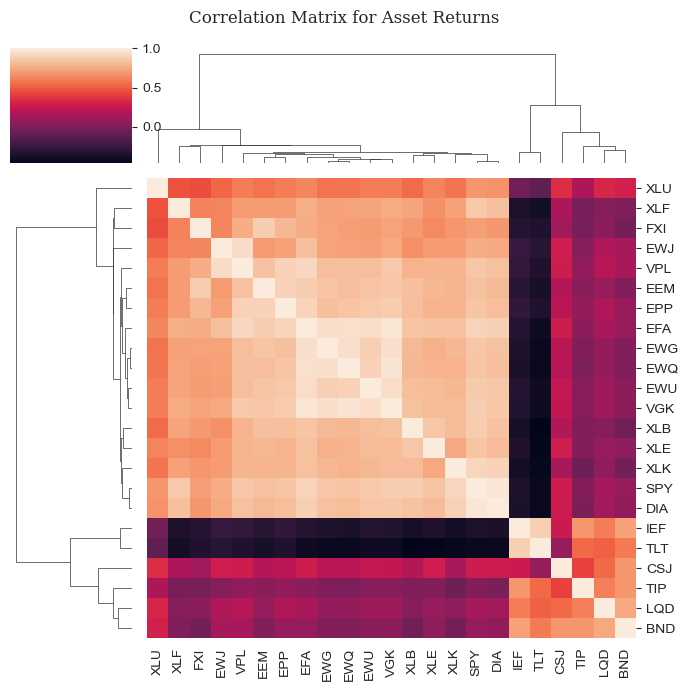

In [100]:
g = sns.clustermap(correlation, figsize=(7, 7))
g.fig.suptitle('Correlation Matrix for Asset Returns', fontsize=12, fontfamily='Serif')
plt.tight_layout()
plt.show()

/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_65439/996803967.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


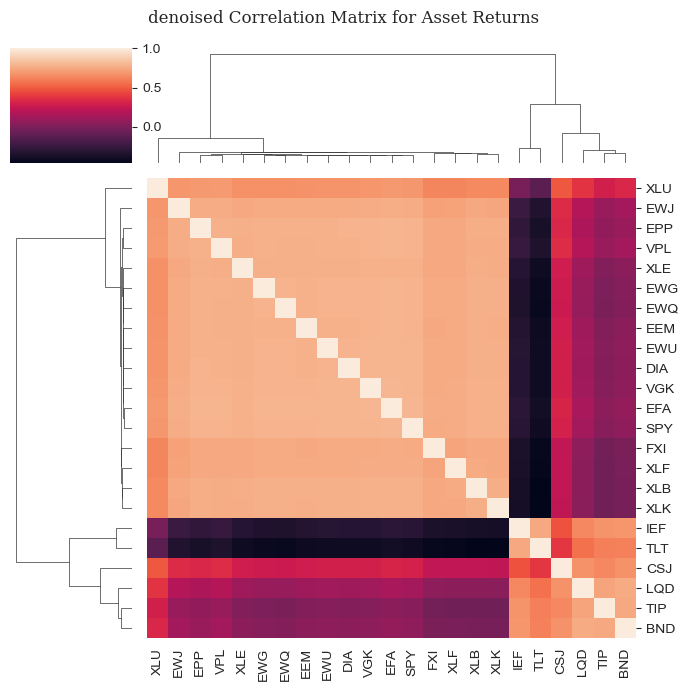

In [108]:
g = sns.clustermap(denoised_corr, figsize = (7,7))
g.fig.suptitle('denoised Correlation Matrix for Asset Returns', fontsize = 12, fontfamily = 'Serif')
plt.tight_layout()
plt.show()

#### Historical Risk Parity Allocation

In [104]:
hrp = HierarchicalRiskParity()
hrp.allocate(asset_names = stock_price.columns, 
             asset_prices = stock_price, 
             asset_returns = stock_returns, 
             resample_by = 'W')
hrp_weights = hrp.weights.sort_values(by = 0, ascending = False, axis = 1)
hrp_weights

,BND,CSJ,TIP,IEF,LQD,XLU,TLT,DIA,XLE,XLB,...,XLK,EWJ,EEM,FXI,VPL,EWG,EFA,EWU,EPP,EWQ
0,0.36088,0.271125,0.121813,0.088239,0.048837,0.019393,0.013946,0.008547,0.007681,0.006411,...,0.004639,0.004563,0.004465,0.00446,0.004412,0.003975,0.003155,0.002624,0.002283,0.002202


Text(0.5, 1.0, 'HRP Portfolio Weights')

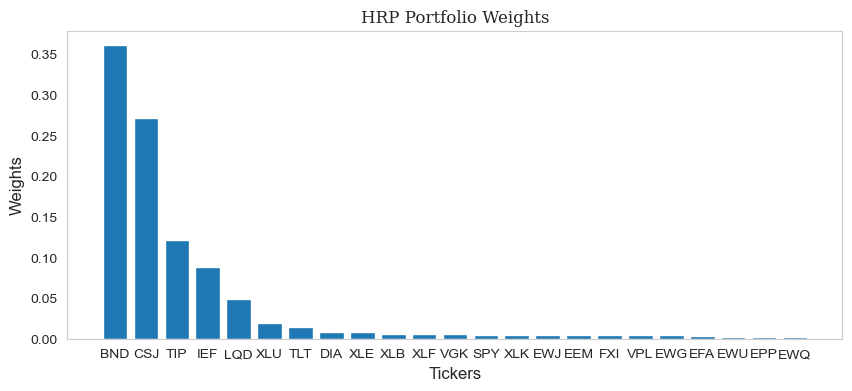

In [107]:
plt.figure(figsize = (10, 4))
plt.bar(hrp_weights.columns, hrp_weights.values[0])
plt.xlabel('Tickers', fontsize = 12)
plt.ylabel('Weights', fontsize = 12)
plt.grid(False)
plt.title('HRP Portfolio Weights', fontsize = 12, fontfamily = 'Serif')

#### Critical Line Algorithm

In [120]:
cla = CriticalLineAlgorithm()

In [136]:
cla.allocate(asset_names = stock_price.columns, 
                            asset_prices = stock_price, 
                            resample_by = 'W')
cla_weights = cla.weights.sort_values(by = 5, ascending = False, axis = 1)

In [137]:
cla_weights

,CSJ,IEF,XLK,FXI,EEM,BND,TLT,SPY,VPL,VGK,...,EWG,XLF,XLE,XLB,EWU,EWQ,EFA,EWJ,TIP,DIA
0,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.0,0.0,1.776357e-15,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000e+00,2.220446e-16,0.443930,0.000000e+00,0.0,0.0,5.560699e-01,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.775558e-17,7.553758e-01,0.242911,0.000000e+00,0.0,0.0,1.713616e-03,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.319714e-01,3.009389e-01,0.067090,1.626303e-19,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6.350498e-01,2.987524e-01,0.065710,4.881481e-04,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


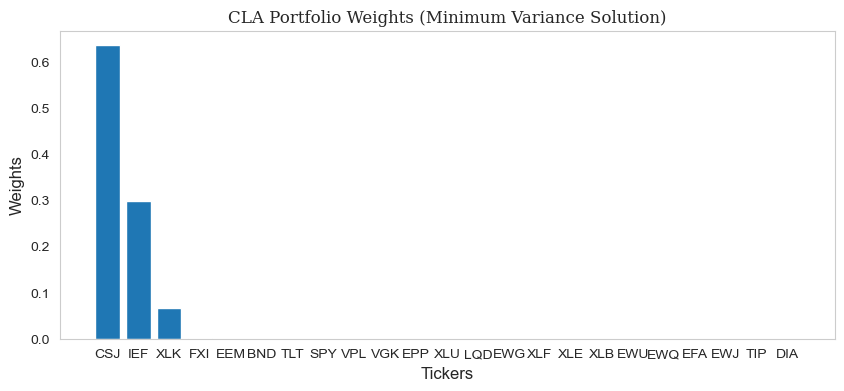

In [138]:
plt.figure(figsize=(10, 4))
plt.bar(cla_weights.columns, cla_weights.values[-1])
plt.xlabel('Tickers', fontsize=12)
plt.ylabel('Weights', fontsize=12)
plt.grid(False)
plt.title('CLA Portfolio Weights (Minimum Variance Solution)', fontsize = 12, fontfamily = 'Serif')
plt.show()

#### IVP allocations

In [139]:
mvo = MeanVarianceOptimisation()
mvo.allocate(asset_names = stock_price.columns, 
              asset_prices = stock_price, 
              resample_by = 'W')
ivp_weights = mvo.weights.sort_values(by = 0, ascending = False, axis = 1)

In [140]:
ivp_weights

,CSJ,BND,TIP,IEF,LQD,TLT,XLU,DIA,SPY,EWJ,...,EWU,VGK,XLB,EPP,EWQ,XLE,EWG,EEM,FXI,XLF
0,0.266933,0.214007,0.116193,0.111735,0.089308,0.024957,0.018381,0.016554,0.014281,0.014205,...,0.00947,0.008854,0.008746,0.008283,0.007513,0.007218,0.00698,0.006935,0.006071,0.004854


Text(0.5, 1.0, 'Inverse Variance Portfolio Weights')

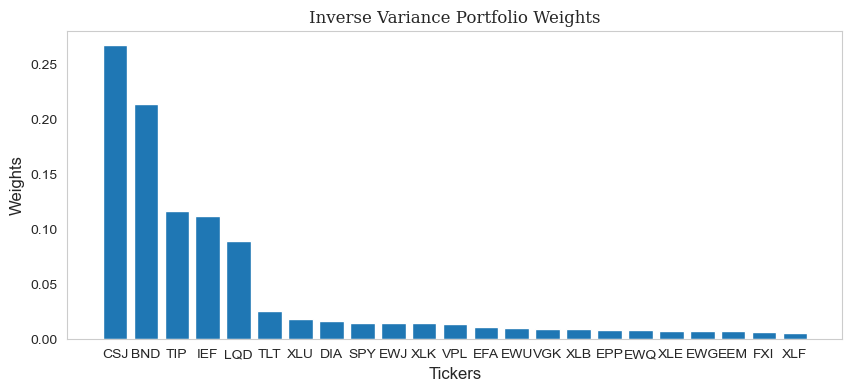

In [141]:
ivp_weights
plt.figure(figsize = (10, 4))
plt.bar(ivp_weights.columns, ivp_weights.values[0])
plt.xlabel('Tickers', fontsize = 12)
plt.ylabel('Weights', fontsize = 12)
plt.grid(False)
plt.title('Inverse Variance Portfolio Weights', fontsize = 12, fontfamily = 'Serif')